# TP1 : ETUDE NUMERIQUE DE LA TRANSFORMEE DE HAAR

### Enoncé : 
Les signaux considérés ici sont du type : $ x = (x_1, x_2,..., x_n )$, n représente la dimension du signal
(on le suppose toujours une puissance de 2) et l’échantillon d’indice i est noté par $ x_i $, pour éviter les
problèmes de traitement aux bords du signal, nous considérerons que le signal est périodique (c’est
à dire : $ x_{n+1} = x_1, x_{n+2} = x_2 $ etc., ainsi que $ x_0 = x_n, x_{−1} = x_{n−1} $ etc.)
On considère les exemples suivants :
- ex1 : $ x_i = i $, 1 ≤ i ≤ n.
- ex2 : une ligne d’une image de notre choix.
- ex3 : $ x_i $ = sin(2πi), 1 ≤ i ≤ n/2 et $ x_i $ = 1/2 + sin(2πi), n/2 < i ≤ n.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

### On écrit la fonction directe qui implémente la transformation directe de Haar multiéchelles.

In [6]:
#version2
def haar_1d_direct(n,u): 
    v = np.copy(u) 
    s = (2.0) 
    w = np.zeros(n)
    m = n 
    while 1 < m : 
        m = (m//2) 
        w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / s 
        w[m:2*m] = (v[0:2*m-1:2] - v[1:2*m:2]) / s 
        v[0:2*m] = w[0:2*m]
    return v

In [7]:
#version 1
def haar_1d_direct_2(n,u):
    v = np.copy(u)
    w = [0.0]*n
    s=2.0
    m=n

    length = m >> 1 #on divise m par 2
    while True:
        for i in range(0,length):
            w[i] = (v[i * 2] + v[i * 2 + 1])/s
            w[length + i] = (v[i * 2] - v[i * 2 + 1])/s

        if length == 1:
            return w

        #Swap arrays to do next iteration
        v = w[:length << 1]
        length >>= 1 #on affecte 1 à length

### On écrit la fonction inverse qui implémente la transformation inverse de Haar multiéchelles.

In [8]:
def haar_1d_inverse(n,u): 
    v = np.copy(u) 
    w = np.zeros((n)) 
    m = 1 
    while (m*2 <= n): 
        w[0:2*m-1:2] = v[0:m] + v[m:2*m]
        w[1:2*m:2]= v[0:m] - v[m:2*m]
        v[0:2*m] = w[0:2*m]
        m=2*m
    return v

### Pour les exemples donnés au dessus, on vérifie que x = inverse(directe(x)) pour les signaux ex1, ex2 et ex3.

In [9]:
# Soit n = 8 la dimension du signal
n=8
#Cas ex1
x1 = [i for i in range(1, n+1)]
print("Exemple 1 : ", x1)
x_a_y = haar_1d_direct_2(len(x1), x1)
print("Fonction direct : ", x_a_y)
y_a_x = haar_1d_inverse(len(x1), x_a_y)
print("Fonction inverse : ", y_a_x)
print(x1 == y_a_x) #comparaison de x à l'inverse de son direct

Exemple 1 :  [1, 2, 3, 4, 5, 6, 7, 8]
Fonction direct :  [4.5, -2.0, -1.0, -1.0, -0.5, -0.5, -0.5, -0.5]
Fonction inverse :  [1. 2. 3. 4. 5. 6. 7. 8.]
[ True  True  True  True  True  True  True  True]


Suite à cette comparaison, on se rend bien compte que ex1 est égale à l'inverse de son direct

J'ai travaillé avec la version 2 de la fonction directe de Haar parce que la version 1 qui correspond à l'implémentation du pseudo code du cours ne me donne pas les résultats attendus.

In [10]:
# Cas ex2
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('lena.png')     
gray = rgb2gray(img)   
x2 = gray[0]

#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#plt.show()
m=4
x2 = x2.tolist()    
x2 = x2[0:8]
x2 = [round(i, 8) for i in x2]
print("Exemple 2 : ", x2)
x_a_y = haar_1d_direct(len(x2), x2)
print("Fonction direct : ", x_a_y)
y_a_x = haar_1d_inverse(len(x2), x_a_y)
y_a_x = [round(i, 8) for i in y_a_x]
print("Fonction inverse : ", y_a_x)
print(x2 == y_a_x) #comparaison de x à l'inverse de son direct

Exemple 2 :  [0.63615845, 0.63615845, 0.63621845, 0.6316812, 0.63622512, 0.61371924, 0.63991061, 0.62997767]
Fonction direct :  [ 0.63250615  0.00254799  0.00110431 -0.00498598  0.          0.00226862
  0.01125294  0.00496647]
Fonction inverse :  [0.63615845, 0.63615845, 0.63621845, 0.6316812, 0.63622512, 0.61371924, 0.63991061, 0.62997767]
True


Dans l'exemple 2, ex2 est égale à l'inverse de son direct

In [11]:
#Cas ex3
# x = sin(2πi), 1 ≤ i ≤ n/2
x3 = [np.sin(2*np.pi*i) for i in range(1, n//2+1)]
# x = 1/2 + sin(2πi), n/2 < i ≤ n
x3_ = [1/2 + np.sin(2*np.pi*i) for i in range(n//2+1, n+1)]
x3.extend(x3_)
x3 = [round(i, 8) for i in x3]
print("Echantillon 3 : ", x3)
x_a_y = haar_1d_direct(len(x3), x3)
print("Fonction direct : ", x_a_y)
y_a_x = haar_1d_inverse(len(x3), x_a_y)
print("Fonction inverse : ", y_a_x)
y_a_x = [round(i, 8) for i in y_a_x]
print(x3 == y_a_x) #comparaison de x à l'inverse de son direct

Echantillon 3 :  [-0.0, -0.0, -0.0, -0.0, 0.5, 0.5, 0.5, 0.5]
Fonction direct :  [ 0.25 -0.25  0.    0.    0.    0.    0.    0.  ]
Fonction inverse :  [0.  0.  0.  0.  0.5 0.5 0.5 0.5]
True


Dans l'exemple 3, ex3 est égale à l'inverse de son direct

### Je réécris les fonctions directe et inverse 1d en utilisant l’instruction “for”.

In [12]:
def haar_1d_direct_with_for(n,u): 
    v = np.copy(u) 
    s = (2.0) 
    w = [0.0]*n
    m = n 
    while 1 < m : 
        for k in range(m//2):
            w[k] = (v[2 * k] + v[2 * k + 1]) / s 
            w[k + (m//2)] = (v[2 * k] - v[2 * k + 1]) / s 
        for k in range(m):
            v[k] = w[k]
        m=m//2
    return v 

In [13]:
def haar_1d_inverse_with_for(n,u): 
    v = np.copy(u) 
    #s = (2.0) 
    w = [0.0]*n
    m = 1
    while m < n : 
        for k in range(0,m//2):
            w[2 * k] = v[k] + v[k + m] 
            w[2 * k + 1] = v[k] - v[k + m] 
        for k in range(2 * m):
            v[k] = w[k]
        m=2 * m
    return v 

### Ecriture d'une fonction de seuillage qui en entrée a un vecteur x de taille n et une valeur de seuil T . La sortie y est définie de la manière suivante si |y i | ≤ T alors y i = 0 autrement le y i = x i .

In [14]:
def seuillage(u, T):
    u = np.array(u)
    return np.where(u > T, u, 0)


### Pour ces exemples, on visualise les valeurs y = directe(x) supérieures à T , pour T = 128 et T = 12.

#### Pour T=12

In [15]:
T=12
# Pour l'exemple 1
y1 = haar_1d_direct_2(len(x1), x1)
s_x1=seuillage(y1, T)
print("Seuils ex1 ",s_x1)

# Pour l'exemple 2
y2 = haar_1d_direct(len(x2), x2)
s_x2=seuillage(y2, T)
print("Seuils ex2 ",s_x2)

# Pour l'exemple 3
y3 = haar_1d_direct(len(x3), x3)
s_x3=seuillage(y3, T)
print("Seuils ex3 ",s_x3)

Seuils ex1  [0. 0. 0. 0. 0. 0. 0. 0.]
Seuils ex2  [0. 0. 0. 0. 0. 0. 0. 0.]
Seuils ex3  [0. 0. 0. 0. 0. 0. 0. 0.]


##### Pour T=128

In [16]:
T=128
# Pour l'exemple 1
y1 = haar_1d_direct_2(len(x1), x1)
s_x1=seuillage(y1, T)
print("Seuils ex1 ",s_x1)

# Pour l'exemple 2
y2 = haar_1d_direct(len(x2), x2)
s_x2=seuillage(y2, T)
print("Seuils ex2 ",s_x2)

# Pour l'exemple 3
y3 = haar_1d_direct(len(x3), x3)
s_x3=seuillage(x3, T)
print("Seuils ex3 ",s_x3)

Seuils ex1  [0. 0. 0. 0. 0. 0. 0. 0.]
Seuils ex2  [0. 0. 0. 0. 0. 0. 0. 0.]
Seuils ex3  [0. 0. 0. 0. 0. 0. 0. 0.]


En gros, pour T=12 et T=128, il n'y a pas de valeur de y supérieur à T. En effet, en utilisant la fonction de seuillage, toutes les valeurs de y inférieures à T sont mises à zéro. Or y n'a que 8 valeurs, on peut donc affirmer que toutes les valeurs de y sont inférieures à T et aucune d'entre elles n'est supérieur à T.

### Pour ces exemples, on  calcule $ e_{2,T} = || x − inverse(seuillage(directe(x), T ))||_2 $ , pour T = 128 et T = 12.

In [17]:
T=12
x1_T = x1 - haar_1d_inverse(len(x1), seuillage(y1, T))
e_ex1_12 = np.linalg.norm((x1_T), ord=2) #calcul de la norme de x1_T
print("Erreur seuil ex1 : ",e_ex1_12)

x2_T = x2 - haar_1d_inverse(len(x2), seuillage(y2, T))
e_ex2_12 = np.linalg.norm((x2_T), ord=2)
print("Erreur seuil ex2 : ",e_ex2_12)

x3_T = x3 - haar_1d_inverse(len(x3), seuillage(y3, T))
e_ex3_12 = np.linalg.norm((x3_T), ord=2)
print("Erreur seuil ex3 : ",e_ex3_12)

Erreur seuil ex1 :  14.2828568570857
Erreur seuil ex2 :  1.7891286605275318
Erreur seuil ex3 :  1.0


In [18]:
T=128
x1_T = x1 - haar_1d_inverse(len(x1), seuillage(y1, T))
e_ex1_12 = np.linalg.norm((x1_T), ord=2) #calcul de la norme de x1_T
print("Erreur seuil ex1 : ",e_ex1_12)

x2_T = x2 - haar_1d_inverse(len(x2), seuillage(y2, T))
e_ex2_12 = np.linalg.norm((x2_T), ord=2)
print("Erreur seuil ex2 : ",e_ex2_12)

x3_T = x3 - haar_1d_inverse(len(x3), seuillage(y3, T))
e_ex3_12 = np.linalg.norm((x3_T), ord=2)
print("Erreur seuil ex3 : ",e_ex3_12)

Erreur seuil ex1 :  14.2828568570857
Erreur seuil ex2 :  1.7891286605275318
Erreur seuil ex3 :  1.0


### Exercice 8. Etudier numériquement la qualité de la reconstruction par rapport aux seuils utilisées. Faire le graphe de l’érreur en fonction du seuil

In [21]:
# fonction qui renvoie les erreurs en fonction des seuils
def getErreur(seuil, x, y):
    e = []
    for i in seuil:
        x_T = x - haar_1d_inverse(len(x), seuillage(y, i))
        e_T = np.linalg.norm((x_T), ord=2)
        print(e_T)
        e.append(e_T)
    return e

# fonction d'affichage du graphe
def affichage(seuil, erreur, couleur):
    plt.plot(seuil, erreur, color=couleur)
    plt.xlabel('seuil')
    plt.ylabel('erreur')
    plt.title('Graphe des erreurs en fonction du seuil')
    plt.legend

In [22]:
# Je choisis les seuils de -129 à 129
T = [t for t in range(-129, 129)]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.656854249492381
6.324555320336759
6.48074069840786
6.48074069840786
6.48074069840786
6.48074069840786
6.48074069840786
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.2828568570857
14.28285685708

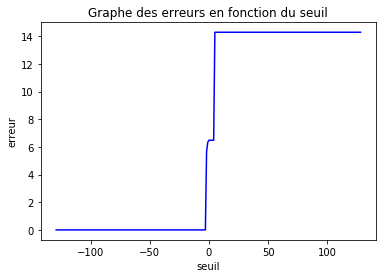

In [23]:
# Pour ex1
e = getErreur(T, x1, y1)
affichage(T, e, 'b')

erreur entre 0 et 14

2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.7194799110210365e-16
2.719479911

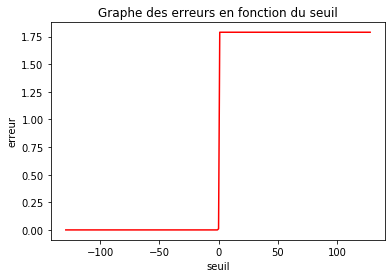

In [24]:
# Pour ex2
e = getErreur(T, x2, y2)
affichage(T, e, 'r')

erreur entre 0 et 1.79

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7071067811865476
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

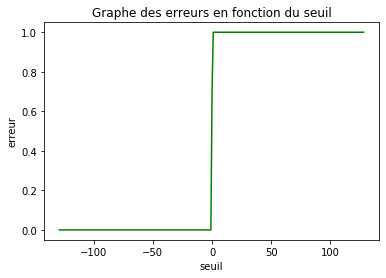

In [25]:
# Pour ex3
e = getErreur(T, x3, y3)
affichage(T, e, 'g')

erreur entre 0 et 1